
**Principal Component Analysis**

* PCA = "Principal Component Analysis"
* Fundamental dimension reduction technique
* First step "decorrelation" 
* Second step reduces dimension (considered later)

![](https://drive.google.com/uc?export=view&id=1aVCWaQ24tUCI-Xo4_H6HkM0gSPj5P5Uz) 

**How it works:**

We have $n$ observations $X^1,\dots,X^n\in \mathbb R^N$ and want to find for them a low dimensional representation $Y^1,\cdots,Y^n\in \mathbb R^p$ with $p<N$.

* First step: compute the correlation matrix of features: $Cor_{i,j}=\sum_n (X^n_i - \text{mean}_m(X^m_i)) (X^n_j - \text{mean}_m(X^m_j))$ a matrix $(N,N)$. 
* $Cor$ is symmetric positive and so diagonalisable with non-negative  eingenvalues. Let $v_1,\cdots,v_N$ be the o.n basis of eigenvectors associated to $\lambda_1\ge \cdots \ge \lambda_N$. Each $v_i\in\mathbb R^N$.
* For each $q$, we call $v_q$ the $q$-th principal component.
* $(X^1,\dots,X^n) * {(v_1,\cdots,v_q)}$ is a matrix multiplication $(n,N)$ by $(N,q)$ and gives a matrix $(N,q)$. The rows of this new matrix are the low dimensional representations of the initial data. <font color='red'> NB: You may take transpositions to make matrix multiplications coherent.</font>  


**PCA follows the fit/transform pattern**
* PCA a scikit-learn component like KMeans or
StandardScaler
* fit() learns the transformation from given data
* transform() applies the learned transformation
* transform() can also be applied to new data

**Application on the iris dataset:**

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
print(df.head())
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)



   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


**PCA Projection to 2D**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf.shape)

(150, 2)


In [ ]:
#display the components: there are 4 each one with dimension 4
#we take the first two ones which are here:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)


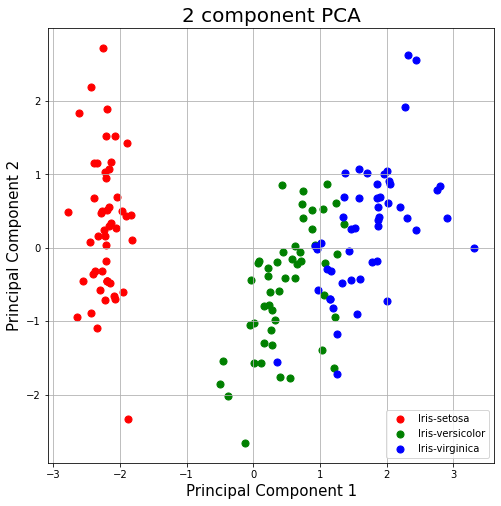

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

**Main properties:**

* The variance of each $v_i$ is $\lambda_i$: $var(v_i)=\lambda_i$
* The principal components are decorrelated: $cov(v_i,v_j)=0$ if $i\neq j$

<font color='red'> To be proved.</font>  


**Plot the explained variance:**

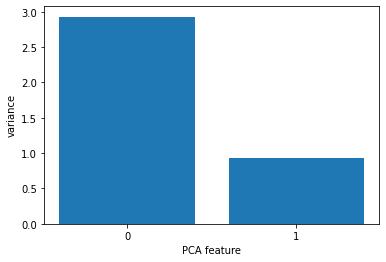

In [ ]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

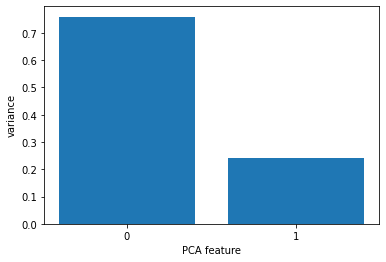

In [ ]:
#normalised
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_/sum(pca.explained_variance_))
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()